In [181]:

import pandas as pd

from sklearn.linear_model import LogisticRegression

data = pd.read_csv("data/titanic/train.csv")
data.head()
df=pd.DataFrame(data)

df.drop(columns=['Cabin','Name','PassengerId','Ticket'],inplace=True)

mediano=df['Age'].median()
df['Age']=df['Age'].fillna(mediano)

df.dropna(subset=['Embarked'],inplace=True)

df_ready=pd.get_dummies(df,columns=['Sex', 'Embarked'],drop_first=True)
model = LogisticRegression(max_iter=1000)
y=df_ready['Survived']
x=df_ready.drop(columns=['Survived'])

model.fit(x,y)

doeta=pd.read_csv("data/titanic/test.csv")
namo=pd.read_csv("data/titanic/names.csv")
ids=pd.read_csv("data/titanic/ids.csv")

median=df['Age'].median()
doeta.drop(columns=['Cabin','Name','PassengerId','Ticket'],inplace=True)
doeta['Age']=doeta['Age'].fillna(median)
mm=doeta['Fare'].median()
doeta['Fare']=doeta['Fare'].fillna(mm)
doeta_ready=pd.get_dummies(doeta,columns=['Sex','Embarked'],drop_first=True)


the_pred=model.predict(doeta_ready)

ids=ids['PassengerId']
namess=pd.read_csv("data/titanic/final_name.csv")
nms=pd.DataFrame(namess)
nms=nms['Names']

final_data={'Name':nms,'PassengerId':ids,'Survived':the_pred}
finalo=pd.DataFrame(final_data)
finalo.dropna(subset=['Name'],inplace=True)
finalo['Status'] = finalo['Survived'].map({1: 'Survived', 0: 'Not Survived'})
finalo.to_csv('data/titanic/final_answer.csv',index=False)

namo.to_csv('data/titanic/final_name.csv',index=False)
finalo.head()

,Name,PassengerId,Survived,Status
0,"Kelly, Mr. James",892,0,Not Survived
1,"Wilkes, Mrs. James (Ellen Needs)",893,0,Not Survived
2,"Myles, Mr. Thomas Francis",894,0,Not Survived
3,"Wirz, Mr. Albert",895,0,Not Survived
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,1,Survived


In [182]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# 1. Load Data | تحميل البيانات
train_data = pd.read_csv("data/titanic/train.csv")
test_data = pd.read_csv("data/titanic/test.csv")

# 2. Data Cleaning | تنظيف البيانات
def clean_data(df):
    # حذف الأعمدة غير المؤثرة مبدئياً
    df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True, errors='ignore')

    # ملء القيم المفقودة (العمر والسعر) بالوسيط
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

    # حذف الصفوف التي لا تحتوي على ميناء (للتدريب فقط)
    if 'Embarked' in df.columns:
        df.dropna(subset=['Embarked'], inplace=True)

    return df

# تنظيف بيانات التدريب
train_df = clean_data(train_data.copy())

# 3. Encoding | تحويل النصوص لأرقام
train_ready = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# 4. Define X and y | تحديد الهدف والمعطيات
y = train_ready['Survived']
X = train_ready.drop(columns=['Survived'])

# 5. Train Model | تدريب الموديل
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
print("✅ Model Trained Successfully!")

# 6. Prepare Test Data | تجهيز بيانات الاختبار
# نحفظ الأسماء والأرقام للعرض النهائي
test_passenger_ids = test_data['PassengerId']
test_names = test_data['Name']

test_df = clean_data(test_data.copy())
test_ready = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

# تأكد أن أعمدة الاختبار مطابقة للتدريب (لتجنب الأخطاء)
test_ready = test_ready.reindex(columns=X.columns, fill_value=0)

# 7. Prediction | التوقع
predictions = model.predict(test_ready)

# 8. Save Results | حفظ النتائج
# بما أنه للعرض في GitHub، سنضيف الاسم ليكون الملف مفهوماً للبشر
final_results = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Name': test_names,
    'Survived': predictions
})


# استبدال 0 و 1 بكلمات مفهومة (اختياري للجمالية)
final_results['Status'] = final_results['Survived'].map({1: 'Survived', 0: 'Not Survived'})

final_results.to_csv("titanic_predictions.csv", index=False)
print("✅ Predictions saved to 'titanic_predictions.csv'")
final_results.head()

✅ Model Trained Successfully!
✅ Predictions saved to 'titanic_predictions.csv'


,PassengerId,Name,Survived,Status
0,892,"Kelly, Mr. James",0,Not Survived
1,893,"Wilkes, Mrs. James (Ellen Needs)",0,Not Survived
2,894,"Myles, Mr. Thomas Francis",0,Not Survived
3,895,"Wirz, Mr. Albert",0,Not Survived
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,Survived


قيم x لنقاط التقاطع هي: [-3.50000000000000, 4.00000000000000]
نقطة التقاطع: (-3.50000000000000, 4.25000000000000)
نقطة التقاطع: (4.00000000000000, -7.00000000000000)


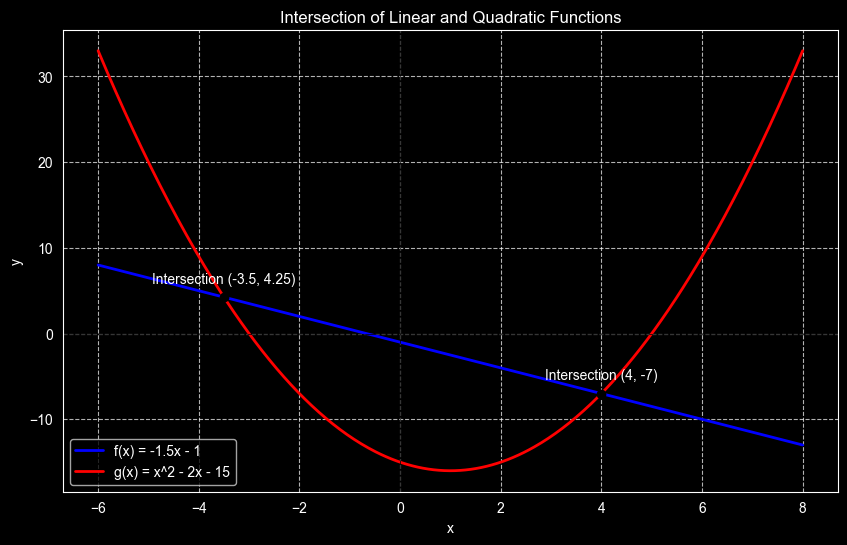

In [175]:
import sympy as sp
# تعريف المتغير x كرمز رياضي

x=sp.Symbol('x')
y=sp.Symbol('y')
# تعريف الدالتين
f = -1.5*x - 1

g=x**2 - 2*x - 15

# حل المعادلة f(x) = g(x)

sl=sp.solve(sp.Eq(f, g), x)

print(f"قيم x لنقاط التقاطع هي: {sl}")

# إيجاد قيم y المقابلة
for sol in solutions:
    y_val = f.subs(x, sol)
    print(f"نقطة التقاطع: ({sol}, {y_val})")
import numpy as np
import matplotlib.pyplot as plt

# توليد قيم x للرسم
x_vals = np.linspace(-6, 8, 400)

# تعريف الدوال كعمليات حسابية
f_vals = -1.5 * x_vals - 1
g_vals = x_vals**2 - 2 * x_vals - 15


plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label='f(x) = -1.5x - 1', color='blue', linewidth=2)
plt.plot(x_vals, g_vals, label='g(x) = x^2 - 2x - 15', color='red', linewidth=2)

# تحديد نقاط التقاطع (التي استخرجناها سابقاً)
plt.scatter([4, -3.5], [-7, 4.25], color='black', zorder=5)
plt.annotate('Intersection (4, -7)', (4, -7), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('Intersection (-3.5, 4.25)', (-3.5, 4.25), textcoords="offset points", xytext=(0,10), ha='center')

# تنسيق الرسم
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.title('Intersection of Linear and Quadratic Functions')
plt.xlabel('x')
plt.ylabel('y')

plt.show()
